In [2]:
import pandas as pd
import seaborn as sns

In [3]:
corrected_pvalues_df = pd.read_csv("figures/summary_data/all_experiment_percent_modification_corrected_pvalues_chi2.csv", 
                                   index_col=0)
other_percent_mod = pd.read_csv("figures/detection_comparison/mod_file.csv", 
                                   index_col=0)

other_percent_mod[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]] = corrected_pvalues_df[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]]
other_percent_mod = other_percent_mod.drop(columns=["error_ms", "error_rms1", "error_rms2"]).dropna()

In [4]:
ranges = pd.concat([(other_percent_mod["percent_hplc"] - other_percent_mod["error_hplc"]).clip(upper=100), (other_percent_mod["percent_hplc"] + other_percent_mod["error_hplc"]).clip(upper=100) , 
 other_percent_mod["percent_rms1"], other_percent_mod["percent_rms2"], other_percent_mod["percent_ms"]], axis=1)


In [15]:
['#CCBB44','#4477AA', '#EE6677', '#66CCEE', '#AA3377', '#BBBBBB']

['#CCBB44', '#4477AA', '#EE6677', '#66CCEE', '#AA3377', '#BBBBBB']

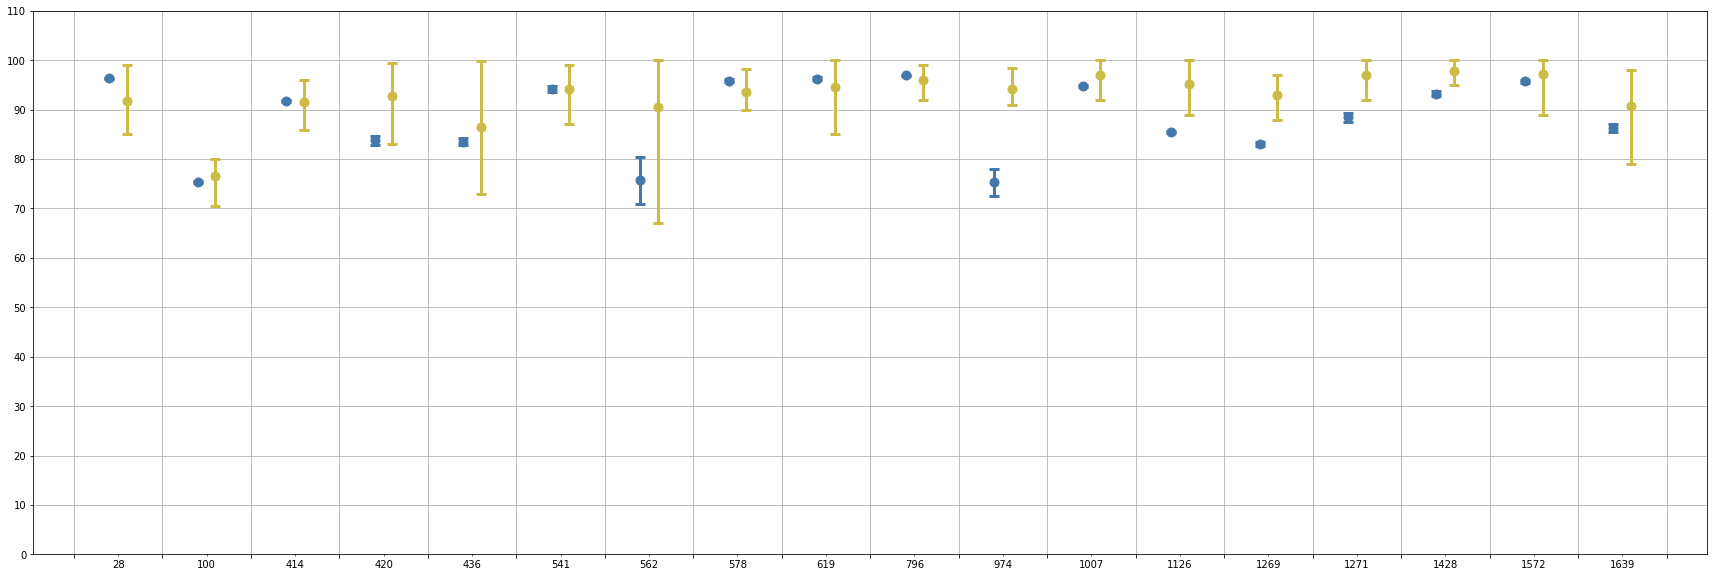

In [22]:
import numpy as np
import matplotlib.pyplot as plt
contig = "18S"
figure_path = f"figures/detection_comparison/percent_mod_variation_{contig}.png"

other_y = ranges.mean(axis=1).values
other_error = pd.DataFrame([other_y - ranges.min(axis=1).values, ranges.max(axis=1).values - other_y])

np_error = ((other_percent_mod[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]].max(axis=1) - 
             other_percent_mod[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]].min(axis=1)) / 2).values * 100    
np_y = other_percent_mod[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]].mean(axis=1).values * 100

if contig == "18S":
    selector = (other_percent_mod["contig"] == "RDN18-1").values
else:
    selector = (other_percent_mod["contig"] == "RDN25-1").values

    
x = np.array(range(len(ranges[selector])))

fig, axs = plt.subplots(figsize=(30,10))

width = 3
plt.errorbar(x+0.1, 
             other_y[selector], 
             yerr=other_error.T[selector].T.values, 
             label="Other Method's Range", fmt='o',
            elinewidth=width,
            capsize=5,
            capthick=width,
            ms=3*width, c="#CCBB44")
# yerr = np.array([(0.5,0.5), (0.3,0.17), (0.1, 0.3), (0.1,0.3)]).T
# plt.errorbar(x, y, yerr, fmt='r^')

plt.errorbar(x-0.1, 
             np_y[selector], 
             yerr=np_error[selector], label="SignalAlign's Range", fmt='o',
            elinewidth=width,
            capsize=5,
            capthick=width,
            ms=3*width, c="#4477AA")


axs.set_xticks(ticks=[x for x in range(len(x))], minor=True)
axs.set_xticks(ticks=[x-0.5 for x in range(len(x)+1)], minor=False)
axs.set_xticklabels(labels=ranges.index[selector], minor=True)
axs.set_xticklabels(labels=["" for x in x], minor=False)

axs.set_ylim([0, 110])
axs.set_yticks(ticks=[x for x in range(0,120,10)], minor=False)

# axs.set_xticks(ticks=x, minor=False)
# axs.set_xticks(ticks=[i-.5 for i in x], minor=True)
# axs.set_xticklabels(labels=ranges.index[selector], minor=True)
# axs.set_xticklabels(labels=["" for i in x], minor=False)

# plt.xticks(ticks=x, labels=ranges.index[selector])
plt.grid(True)
# plt.legend(loc='lower right')


if figure_path is not None:
    plt.savefig(figure_path)
else:
    plt.show()

In [9]:
corrected_pvalues_df = pd.read_csv("figures/summary_data/all_experiment_percent_modification_corrected_pvalues_chi2.csv", 
                                   index_col=0)
ribo_met = pd.read_csv("figures/detection_comparison/ribomet_seq.csv", 
                                   index_col=1)

ribo_met[["Dbp3d_YPD_mean", "Dbp3d_YPD2_mean"]] = corrected_pvalues_df[["Dbp3d_YPD_mean", "Dbp3d_YPD2_mean"]]


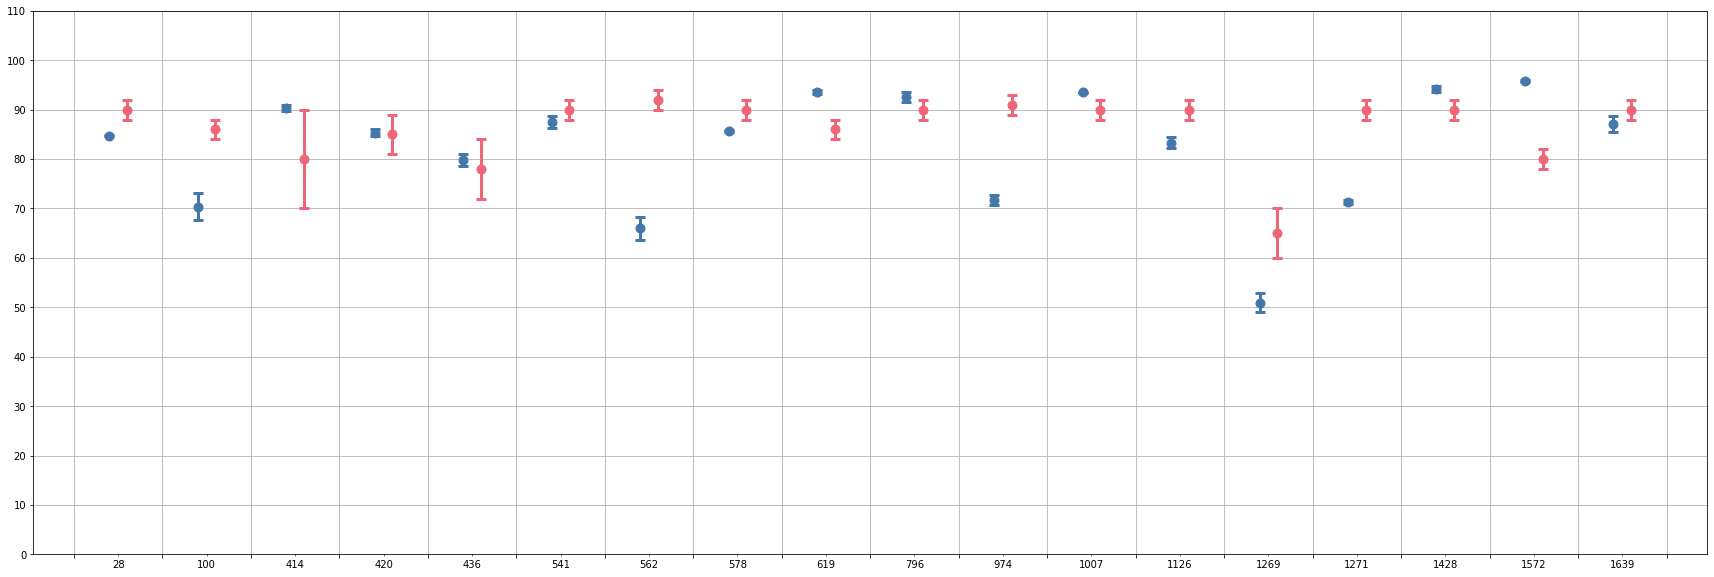

In [27]:
import numpy as np
import matplotlib.pyplot as plt
contig = "18S"
figure_path = f"figures/detection_comparison/percent_mod_variation_dbp3_{contig}.png"
# figure_path = None
other_y = ribo_met["dbp3"]
other_error = ribo_met["dbp3_delta"]

np_error = ((ribo_met[["Dbp3d_YPD_mean", "Dbp3d_YPD2_mean"]].max(axis=1) - 
             ribo_met[["Dbp3d_YPD_mean", "Dbp3d_YPD2_mean"]].min(axis=1)) / 2).values * 100    
np_y = ribo_met[["Dbp3d_YPD_mean", "Dbp3d_YPD2_mean"]].mean(axis=1).values * 100

if contig == "18S":
    selector = (ribo_met["contig"] == "18S").values
else:
    selector = (ribo_met["contig"] == "25S").values

    
x = np.array(range(len(ribo_met[selector])))

fig, axs = plt.subplots(figsize=(30,10))

width = 3
plt.errorbar(x+0.1, 
             other_y[selector], 
             yerr=other_error[selector], 
             label="RiboMethSeq Range", fmt='o',
             elinewidth=width,
            capsize=5,
            capthick=width,
            ms=3*width, c='#EE6677')

plt.errorbar(x-0.1, 
             np_y[selector], 
             yerr=np_error[selector], label="SignalAlign's Range", fmt='o',
            elinewidth=width,
            capsize=5,
            capthick=width,
            ms=3*width, c="#4477AA")


axs.set_xticks(ticks=[x for x in range(len(x))], minor=True)
axs.set_xticks(ticks=[x-0.5 for x in range(len(x)+1)], minor=False)
axs.set_xticklabels(labels=ribo_met.index[selector], minor=True)
axs.set_xticklabels(labels=["" for x in x], minor=False)

# axs.set_xticks(ticks=x, minor=False)
# axs.set_xticks(ticks=[i-.5 for i in x], minor=True)
# axs.set_xticklabels(labels=ranges.index[selector], minor=True)
# axs.set_xticklabels(labels=["" for i in x], minor=False)
axs.set_ylim([0, 110])
axs.set_yticks(ticks=[x for x in range(0,120,10)], minor=False)

# plt.xticks(ticks=x, labels=ranges.index[selector])
plt.grid(True)
# plt.legend(loc='lower right')


if figure_path is not None:
    plt.savefig(figure_path)
else:
    plt.show()